# MNIST Task

MNIST stands for Mixed National Institute of Standards and Technology, which has produced a handwritten digits dataset. This is one of the most researched datasets in machine learning, and is used to classify handwritten digits. This dataset contains 60,000 training images and 10,000 testing images, formatted as 28 x 28 pixel monochrome images. 

There are many ways to get this dataset. Today, let's use the __data fetching function__ and to get the dataset from [OpenML](https://www.openml.org) website. You can spend some time exploring this site. It has many interesting machine learning tasks and datasets.

In [2]:
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.io import arff

In [3]:
#Load the digits dataset, and separate the features and targets
#Load the digits dataset, and separate the features and targets
mnist = arff.loadarff('mnist_784.arff')
df = pd.DataFrame(mnist[0])

#Features
X=df.drop(['class'], axis=1)

#Target
target=df['class'].values
y=pd.Series(target)

In [4]:
# Let's see the first image
type(X)



pandas.core.frame.DataFrame

In [5]:
#Let's see the first 10 data records
X.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X['pixel123']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
69995     0.0
69996    61.0
69997     0.0
69998     0.0
69999     0.0
Name: pixel123, Length: 70000, dtype: float64

In [7]:
#What's the type of the label

type(y)

pandas.core.series.Series

In [8]:
#Check the shape of the features
X.shape

(70000, 784)

In [9]:
#Check the shape of the target
y.shape

(70000,)

In [10]:
X['pixel1']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
69995    0.0
69996    0.0
69997    0.0
69998    0.0
69999    0.0
Name: pixel1, Length: 70000, dtype: float64

Text(0.5, 1.0, "b'5'")

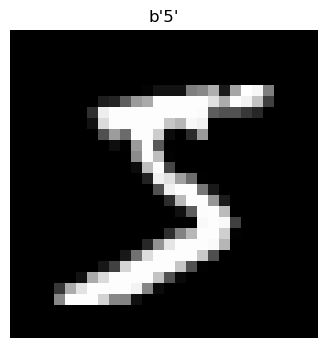

In [11]:
#Let's plot the image of the first datapoint
f,ax = plt.subplots(figsize=(4,4))
index = 0
datagrid = X.iloc[index].values.reshape(28,28)
ax.imshow(datagrid,cmap = 'gray')
ax.axis('off')
ax.set_title(y.iloc[index])

Now you have `X` and `y`, please complete the following task

## Task 1. Use subplots to display the first 100 image samples


*   It is time to test your skills in using `matplotlib` and our recommended coding style. 

You may need to use for loop in a range. Check the [example](https://www.w3schools.com/python/ref_func_range.asp) 


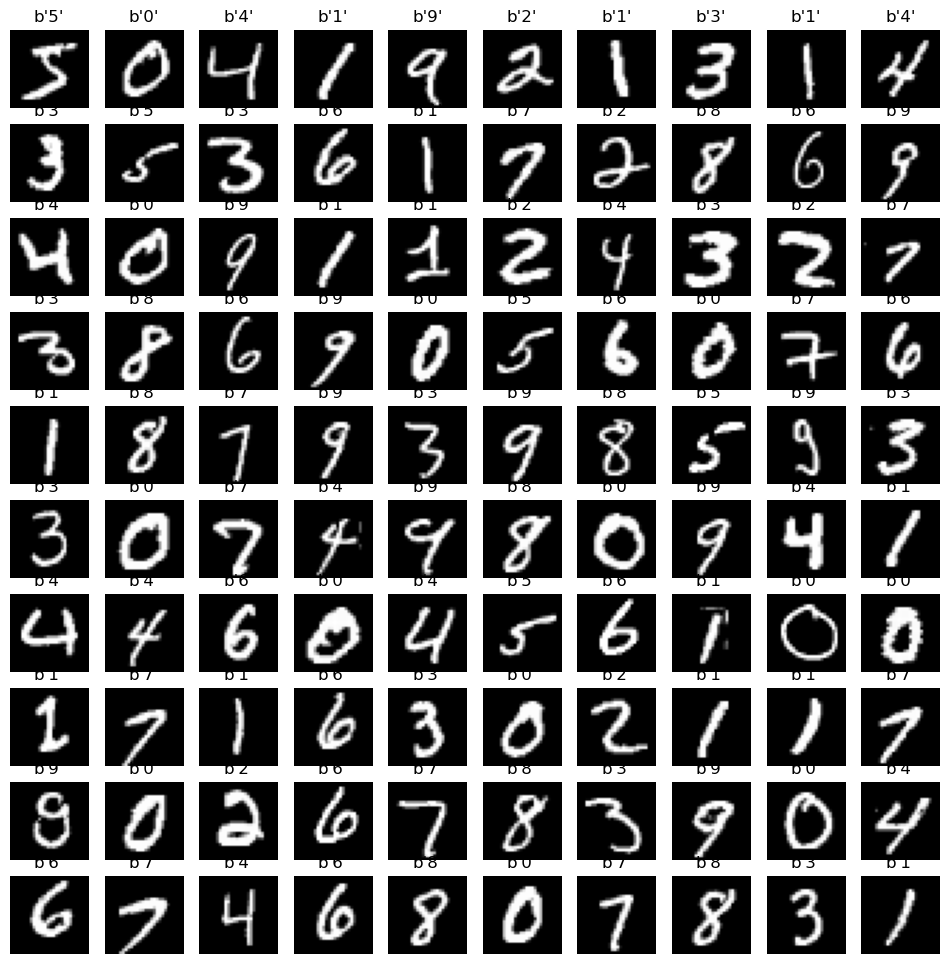

In [12]:
fig,ax = plt.subplots(nrows=10, ncols=10,figsize=(12,12))
for i in range(10):
      for j in range(10):
        digi_image = X.iloc[i*10+j].values.reshape(28,28)
        ax[i][j].imshow(digi_image,cmap = 'gist_gray')
        ax[i][j].axis('off')
        ax[i][j].set_title(y[i*10+j])

In [13]:
X = pd.DataFrame(X[:].values)

In [14]:
X

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



## Task 2. Train Test Split (not the usual way)
As we mentioned in the PPT, the author of MNIST datase defined that the last 10,000 images are for testing, so you can compare your ML algoreithm's accuracy with everyone-else. So it is NOT a good idea to use `train_test_split` function here. 

*   Hint: Check out the data fromat of `X` and `y`.You can use __indexing/slicing__ techniques for array/matrix/list




In [15]:
X_train = X[:60000].astype(int)
X_test = X[60000:].astype(int)
y_train = y[:60000].astype(int)
y_test = y[60000:].astype(int)

## Task 3. Plot the histogram (10 bins) for counting the number of each label from training dataset 

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

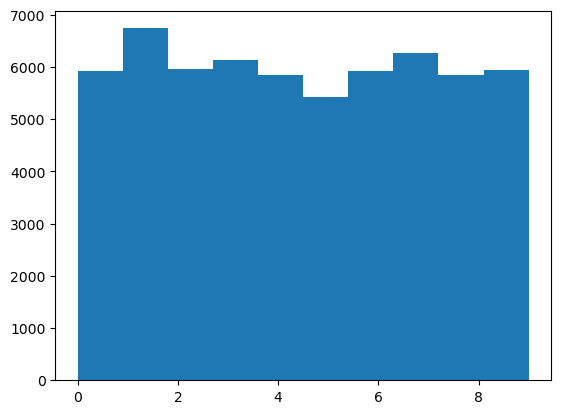

In [16]:
plt.hist(y_train,bins=10)

## Task 4. Training


*  You can follow the demo of "HeartDisease.ipynb" and train at least two models: KNN and SVM
*  __Warning__: Train the model will take some time (especially the SVM)
*  __Warning__: Use accuracy score will also be very slow, and the score is less useful in a multi-label task (i.e. which label is more accurate?). We will use more helpful tool to evaluate the system



In [17]:
knnclf = KNeighborsClassifier(n_neighbors = 1)
knnclf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
knn_pred = knnclf.predict(X_test)
print(knn_pred)

[7 2 1 ... 4 5 6]


/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Week 7: Using Cross Validation and other Evaluation Metrics

# Generate the classification report for each model

>Check on using classification report using sklearn [Doc] (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [19]:
#Generate the classification report using classification_report function, and also including the target labels as one of its aurguments
target = ()
print(target)

()


In [20]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Measuring Accuracy using Cross-Validation

Let's use the *k-fold* `cross_val_score()` from __Scikit-Learn__ to evaluate the model. Check the [Doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) for more details.
>Use 10 for the value of CV.

>Compute the mean accuracy of the models.

> As a side note, visit this [Doc](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) if you want to know more scoring metrics

Note: We can use the last 5000 data point from the training data for the validation.
Slice the last 5000 data from training dataset
name it as X_validation and y_validation





In [21]:
# Use the last 5000 for X_validation and y_validation
X_validation =  X_train[55000:].astype('int')
y_validation =  y_train[55000:].astype('int')

In [22]:
#Evaluate the model using closs_val_score for cross validation using cv =10, you can tune the value of CV.
results = cross_val_score(knnclf, X_validation, y_validation, cv=10, scoring='accuracy')
results

/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

array([0.938, 0.956, 0.924, 0.946, 0.92 , 0.92 , 0.968, 0.966, 0.952,
       0.964])

In [23]:
#Compute the mean accuracy score
results.mean()

0.9454

# Can you find the optimal model for k=[1-11]?

In [24]:
#Search for the optimal value of neighbours for KNN using range(1,31,2.
nrange = range(1,11,2)
print(range)
k_scores = []
k_score = []

for k in nrange:
    k_score.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_validation,y_validation,cv=10,scoring ='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

<class 'range'>


/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

[0.9454, 0.943, 0.9465999999999999, 0.9410000000000002, 0.9388]


/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
#Compute the mean of the accuracy
np.array(k_scores).mean()

0.94296

# Draw a line plot showing the values of n against accuracy

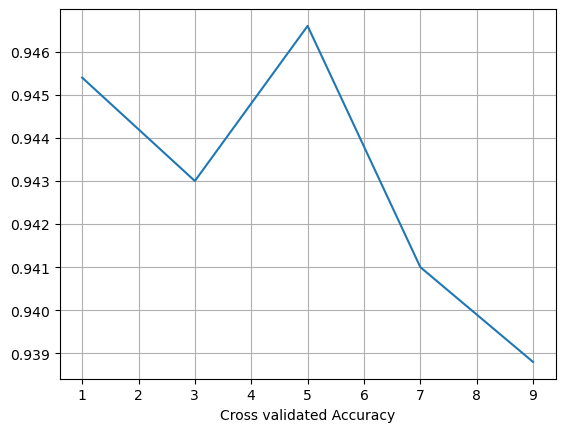

In [26]:
#Plot n value for KNN against the accuracy
plt.plot(nrange, k_scores)
plt.xlabel("value of k for KNN")
plt.xlabel("Cross validated Accuracy")
plt.grid(True)

# Generating the confusion matrix
## Create a Confusion Matrix

A much detailed evaluation to evaluate the performance of a classifier is to look at the *confusion matrix*. 

To compute the confusion matrix, you first need to have a set of __predicitions__ so that then can be compared to the actual targets.


*   Generate a prediction set from the test samples
*   Create the 10-class nomrmalized and non-normalized confusion matrices. Check the [Doc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for more details
*   Display the raw matrix and use it to evaluate the system performance. Which class is more easy to be "confused"?
*   __[Option]__ Illustrate the matrix as a heatmap [Recap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
*   __[Option]__ Based on the matrix, can you display some/all handwriting samples from the incorrect predictions? For example, some "5" are recognised as "3", Do you think they are tricky to distinguish?



In [27]:
#Normalized confusion matrix
y_pred=knnclf.predict(X_validation)
X_validation.shape
y_validation.shape
conf_mx = confusion_matrix(y_validation, y_pred,normalize='true')

/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [28]:
#Non-normalised matrix

In [29]:
print(conf_mx)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Text(95.72222222222221, 0.5, 'Actual')

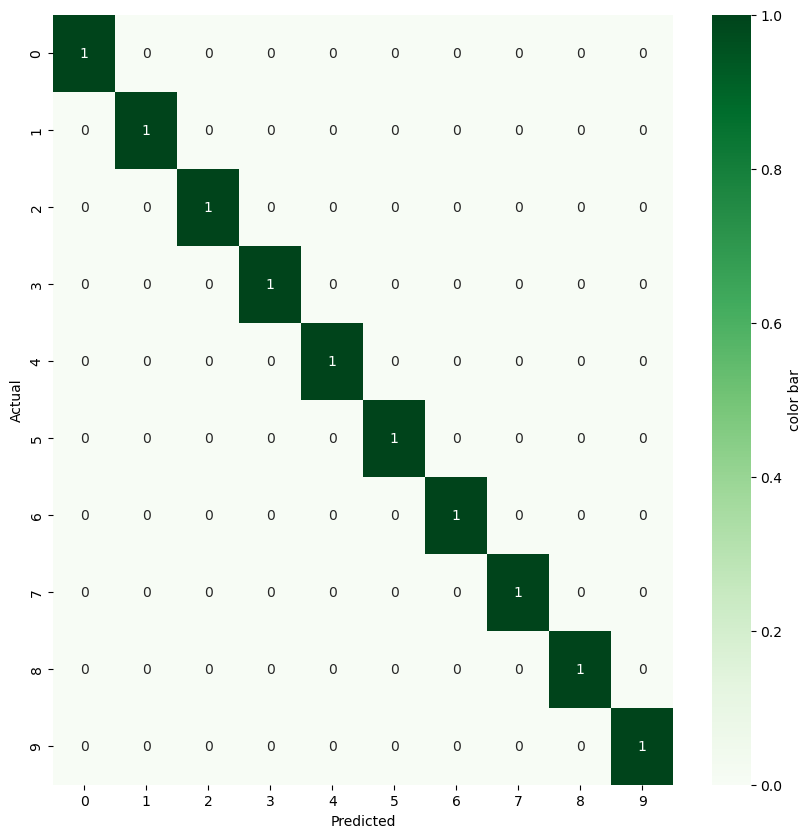

In [30]:
# Plot the heat map of the confusion matrix
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mx, cmap="Greens", annot = True, cbar_kws={"orientation":"vertical","label":"color bar"})
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Repeat the above for the SVM

In [31]:
svmclf = svm.SVC(gamma = 0.001, C= 100)
svmclf.fit(X_train,y_train) #9 or more mins to train   